# Spike Challenge - Predicción de caudales extremos en Chile

In [99]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

## 1. Carga datos

In [3]:
#Carga los datos desde el csv y los guarda como pandas.Dataframe
df = pd.read_csv('caudal_extra.csv', delimiter = ',')
#Función que cambia el formato de la columna 'fecha' de object a Datetime
df = df.apply(lambda col: pd.to_datetime(col, errors='ignore') 
              if col.dtypes == object
              else col, 
              axis=0)
#df.dtypes

## 2. Análisis dataset

Algunas queries para aprender a usar pandas.Dataframe


In [38]:
#first 5 lines
df.head()
#last 5 lines
df.tail()
#read 5 random samples
#print(df.sample(5))
#print(df.iloc[1])
df[['codigo_estacion','nombre', 'fuente', 'nombre_sub_cuenca', 'gauge_id', 'gauge_name']]
print(df[df.institucion != 'DGA'])
df.head()[['codigo_estacion','nombre', 'fuente', 'nombre_sub_cuenca', 'gauge_id', 'gauge_name']]
df[df.institucion == 'DGA'][['codigo_estacion','nombre', 'fuente', 'nombre_sub_cuenca', 'gauge_id', 'gauge_name']].head()
df[df.altura > 130]
df

Empty DataFrame
Columns: [Unnamed: 0, codigo_estacion, institucion, fuente, nombre, altura, latitud, longitud, codigo_cuenca, nombre_sub_cuenca, cantidad_observaciones, fecha, caudal, gauge_id, gauge_name, precip_promedio, temp_max_promedio, estacion_año, caudal_extremo, precip_extremo, temp_extremo]
Index: []

[0 rows x 21 columns]


,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,estacion_año,caudal_extremo,precip_extremo,temp_extremo
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.000000,NaN,Verano,0.0,0.0,0.0
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.000000,NaN,Otoño,0.0,0.0,0.0
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.000000,NaN,Otoño,0.0,0.0,0.0
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.000000,NaN,Invierno,0.0,0.0,0.0
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.000000,NaN,Invierno,0.0,0.0,0.0
5,5,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-07-27 00:00:00+00:00,0.822,4540001,Rio Grande En Paloma 1,0.000000,NaN,Invierno,0.0,0.0,0.0
6,6,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-09-16 00:00:00+00:00,0.910,4540001,Rio Grande En Paloma 1,0.000000,NaN,Invierno,0.0,0.0,0.0
7,7,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-10-31 00:00:00+00:00,2.070,4540001,Rio Grande En Paloma 1,0.000000,NaN,Primavera,0.0,0.0,0.0
8,8,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-11-26 00:00:00+00:00,4.410,4540001,Rio Grande En Paloma 1,0.000000,NaN,Primavera,0.0,0.0,0.0
9,9,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-12-04 00:00:00+00:00,5.480,4540001,Rio Grande En Paloma 1,0.000000,NaN,Primavera,0.0,0.0,0.0


In [39]:
df.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio,caudal_extremo,precip_extremo,temp_extremo
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06,1.411180e+06,1.411180e+06,1.411180e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01,6.377641e-06,7.086268e-06,3.684859e-05
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00,2.525392e-03,2.661996e-03,6.070195e-03
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01,1.000000e+00,1.000000e+00,1.000000e+00


¿Qué puedes decir de los datos, distribuciones, missing, u otros?¿Hay algo que te llame la atención?
¿Por qué hay tantos valores missing? Pensar en la manera en que se elaboró el dataset, descrito más arriba.

En la columna de precipitaciones promedio, hay muchos valores 0 y en temperatura máxima promedio muchos valores NaN

## 3. Plots de precipitación, temperatura y caudal

### 3.a. Una columna

Función que permite graficar los datos de caudal de una estación en particular en un rango de fechas.

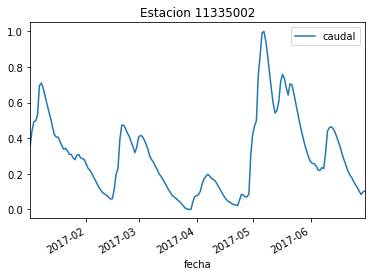

In [4]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    query =  df[(df.codigo_estacion == codigo_estacion) & (df.fecha > fecha_min) & (df.fecha < fecha_max)][[columna, 'fecha']]

    ax = plt.gca()
    scaler = MinMaxScaler()
    query['caudal'] = scaler.fit_transform(query['caudal'].values.reshape(-1,1))
    query.plot(kind='line',x='fecha',y='caudal',ax=ax)
    ax.set_title('Estacion ' + str(codigo_estacion))    

    plt.show()

time_plot_una_estacion(11335002, 'caudal', '2017-01-01', '2017-07-31')

### 3.b. Varias columnas

Función que permite graficar los datos de caudal, precipitación promedio y temperatura máxima promedio de una estación en particular en un rango de fechas.

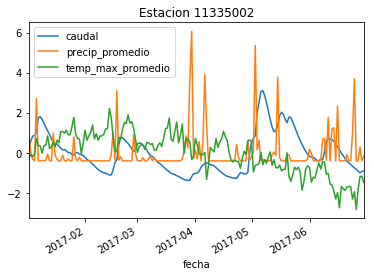

In [5]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    columnas.append('fecha')
    scaler = StandardScaler()
    query =  df[
        (df.codigo_estacion == codigo_estacion) & (df.fecha > fecha_min) & (df.fecha < fecha_max)
    ][columnas]
    
    query['precip_promedio'] = scaler.fit_transform(query['precip_promedio'].values.reshape(-1,1))
    query['temp_max_promedio'] = scaler.fit_transform(query['temp_max_promedio'].values.reshape(-1,1))
    query['caudal'] = scaler.fit_transform(query['caudal'].values.reshape(-1,1))

    ax = plt.gca()
    for i in columnas:
        if(i != 'fecha'):
            query.plot(kind='line',x='fecha',y=i,ax=ax)
            
    ax.set_title('Estacion ' + str(codigo_estacion))    
    #print(query)
    plt.show()

time_plot_estaciones_varias_columnas(
    11335002, ['caudal','precip_promedio', 'temp_max_promedio'] , '2017-01-01', '2017-07-31'
)

## 4. Caudal, temperatura y precipitación extremos

In [6]:
#Cambiar columna fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

#Agregar columna de estación del año

#print(df.groupby(['codigo_estacion'])['codigo_estacion'].count())
df['estacion_año'] = np.where((df['fecha'].dt.dayofyear >= 79) & (df['fecha'].dt.dayofyear < 172), 'Otoño', 
np.where((df['fecha'].dt.dayofyear >= 172) & (df['fecha'].dt.dayofyear < 264), 'Invierno', 
np.where((df['fecha'].dt.dayofyear >= 264) & (df['fecha'].dt.dayofyear < 355) , 'Primavera',
         np.where(df['fecha'].dt.dayofyear >= 355, 'Verano', 'Verano'))))

#print(df.groupby('estacion_año')['fecha'].nunique())
#print(df.groupby('codigo_estacion')['fecha'].nunique())
#print(df['estacion_año'].value_counts())
#print(df.codigo_estacion.value_counts())
#print(df)
#df[df['estacion_año'] == 'O'][['fecha', 'estacion_año']]

#print([df['estacion_año'] == 'P'])
#print(np.where(df['fecha'].dt.dayofyear > 355))

#verano 2019-12-21 2020-03-20             355 - 365 0 - 79
#otoño 2020-03-20 2020-06-21             79 -172 
#invierno 2020-06-21 2020-09-21           172 - 264
#primavera 2020-09-21 2020-12-21              264 - 355
#df['estacion_año'] = df.apply(add_estacion, axis=1)
#print(df[(df.caudal == df.caudal.max()) & (df['estacion_año'] == 'Invierno')])
estaciones = ['Otoño', 'Invierno', 'Primavera', 'Verano']
codigos_estaciones = pd.unique(df.codigo_estacion)
for codigo_estacion in codigos_estaciones:
    values_by_codigo_estacion = df[df['codigo_estacion'] == codigo_estacion]
    for estacion in estaciones:
        values_by_estacion = values_by_codigo_estacion[values_by_codigo_estacion['estacion_año'] == estacion]
        max_caudal = values_by_estacion.sort_values(by=['caudal'], ascending=False).head(1)['caudal'].item()
        max_precip = values_by_estacion.sort_values(by=['precip_promedio'], ascending=False).head(1)['precip_promedio'].item()
        max_temp = values_by_estacion.sort_values(by=['temp_max_promedio'], ascending=False).head(1)['temp_max_promedio'].item()
        #print(caudal* 0.95, precip* 0.95, temp* 0.95)
        #print(np.where((df['caudal'] >= max_caudal * 0.95) & (df['estacion_año'] == estacion), '1', '0'))
        #print(values_by_estacion['estacion_año'] == estacion)
        df.loc[(df['estacion_año'] == estacion) & (df['codigo_estacion'] == codigo_estacion), 'caudal_extremo'] = np.where((values_by_estacion['caudal'] >= max_caudal * 0.95) & (values_by_estacion['estacion_año'] == estacion), 1, 0)
        df.loc[(df['estacion_año'] == estacion) & (df['codigo_estacion'] == codigo_estacion), 'precip_extremo'] = np.where((values_by_estacion['precip_promedio'] >= max_precip * 0.95) & (values_by_estacion['estacion_año'] == estacion), 1, 0)
        df.loc[(df['estacion_año'] == estacion) & (df['codigo_estacion'] == codigo_estacion), 'temp_extremo'] = np.where((values_by_estacion['temp_max_promedio']>= max_temp * 0.95) & (values_by_estacion['estacion_año'] == estacion), 1, 0)
    #print(df[df['caudal_extremo'] == 1]['caudal'])
    #print(df[df['precip_extremo'] == 1]['precip_promedio'])
    #print(df[df['temp_extremo'] == 1]['temp_max_promedio'])
    #df

4540001
10414001
11040001
6019003
11530000
10311001
10704002
7317003
11536004
8140002
12876004
8381003
5721016
8380006
7379002
8106002
1021001
1020003
8141001
11147001
11143001
11141001
3826001
3820002
3825001
3820003
3820001
4550003
4558001
7116001
11711000
11710000
11337001
11335002
4308001
9402001
4503001
4726001
12289002
12289001
12284007
11315001
11317001
11310001
9437002
3804002
3806001
9116001
7123001
5423003
4320001
1211001
7355001
7359001
7355002
7357002
5704002
11308001
7383001
5410005
5410002
5710001
8394001
5737002
1050004
3431001
8358001
4535002
4537001
2103003
2105005
2105007
2104002
2104003
2105002
2105001
9123001
9129002
11342001
9140001
8334001
8319001
8313001
8312000
8312001
8316002
8317004
8317005
4730001
3450001
3453001
4335001
4513001
2120001
8106001
8307002
8308000
8304001
4716001
4716004
4711001
4714001
3430002
3434003
3430001
4523002
8133001
8135002
8132001
7381001
10364001
5730005
5734001
7335001
7335002
7332001
6035001
6034023
5421001
11542001
11545000
4323001

¿Les parece razonable esta medida para capturar algo “extremo”?
    Creo que está bien la idea de capturar un evento extremo dependiendo de cada estación del año(ya que varía mucho la temperatura y/o precipitaciones) o estación de medición(en este caso su geolocalización y como afecta la estacionalidad) ya que cada uno podría tener comportamientos totalmente distintos.
    
¿Usarían otra?¿Cuál?
    Se podría analizar los días anteriores y posteriores, y ver los comportamientos en ese rango de días. Por ejemplo sacar la media de ese rango y ver cuál valor está por sobre ella.

## 5.Analicen la variable caudal_extremo. Los comportamientos en diferentes cuencas son muy diferentes?

In [101]:
c = df[df['caudal_extremo'] == 1]['caudal']
print(c.max())
print(c.min())
print(c.mean())

15805.0
0.171
540.6867431466031


Como vemos arriba, los comportamientos son muy distintas una cuenca de otra, siendo el valor máximo de caudal extremo 15805 y el mínimo 0.171.

## 6. Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo, temp_extremo, precip_extremo). Se han vuelto más o menos comunes?

In [61]:
#Aquí creamos 3 distintas listas que corresponden al % de caudal, temp, y prec extremas por año
from __future__ import division
years = pd.unique(df.fecha.dt.year)
caudal_extremo = []
temp_extremo = []
precip_extremo = []
for year in years:
    values_by_year = df[df['fecha'].dt.year == year]
    v_by_year = values_by_year.shape[0]
    caudal_extremo_by_year = (values_by_year[values_by_year.caudal_extremo == 1].shape[0])/v_by_year
    temp_extremo_by_year = values_by_year[values_by_year.temp_extremo == 1].shape[0]/v_by_year
    precip_extremo_by_year = values_by_year[values_by_year.precip_extremo == 1].shape[0]/v_by_year

    caudal_extremo.append([caudal_extremo_by_year, year])
    temp_extremo.append([temp_extremo_by_year, year])
    precip_extremo.append([precip_extremo_by_year, year])

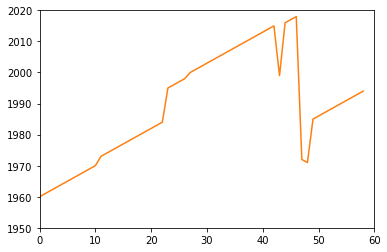

In [85]:
caudal_extremo = np.sort(np.array(caudal_extremo))
#print(caudal_extremo)
fig, ax = plt.subplots()

ax.set_xlim(0, 60)
ax.set_ylim(1950, 2020)
ax = plt.gca()
ax.plot(caudal_extremo)

plt.show()

def time_plot_extreme_events():
    columnas = ['caudal_extremo', 'temp_extremo', 'precip_extremo']
    query =  df[columnas]
    
    ax = plt.gca()
    for i in columnas:
        if(i != 'fecha'):
            query.plot(x='fecha',y=i,ax=ax)
            
    ax.set_title('Extremos')    
    #print(query)
    plt.show()

#time_plot_extreme_events()